<a href="https://colab.research.google.com/github/krameritis/House_price_prediction/blob/main/House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, PolynomialFeatures
import seaborn as sns
from sklearn.model_selection import learning_curve, cross_val_score, train_test_split,KFold,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import make_pipeline

In [120]:
# Collect and clean the data
df = pd.read_csv('Hpp.csv')
df = df.dropna()
df


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,60,RL,7917,Inside,1Fam,5,1999,2000,VinylSd,0.0,953.0,175000.0
1456,1456,20,RL,13175,Inside,1Fam,6,1978,1988,Plywood,163.0,1542.0,210000.0
1457,1457,70,RL,9042,Inside,1Fam,9,1941,2006,CemntBd,0.0,1152.0,266500.0
1458,1458,20,RL,9717,Inside,1Fam,6,1950,1996,MetalSd,1029.0,1078.0,142125.0


In [121]:
# Exploratory Data Analysis (EDA)
# Let's take a quick look at the first few rows of the dataset
print(df.head())

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [122]:
# Summary statistics of the dataset
print(df.describe())

                Id   MSSubClass        LotArea  OverallCond    YearBuilt  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    729.500000    56.897260   10516.828082     5.575342  1971.267808   
std     421.610009    42.300571    9981.264932     1.112799    30.202904   
min       0.000000    20.000000    1300.000000     1.000000  1872.000000   
25%     364.750000    20.000000    7553.500000     5.000000  1954.000000   
50%     729.500000    50.000000    9478.500000     5.000000  1973.000000   
75%    1094.250000    70.000000   11601.500000     6.000000  2000.000000   
max    1459.000000   190.000000  215245.000000     9.000000  2010.000000   

       YearRemodAdd   BsmtFinSF2  TotalBsmtSF      SalePrice  
count   1460.000000  1460.000000  1460.000000    1460.000000  
mean    1984.865753    46.549315  1057.429452  180921.195890  
std       20.645407   161.319273   438.705324   79442.502883  
min     1950.000000     0.000000     0.000000   34900.000000  


In [123]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   MSSubClass    1460 non-null   int64  
 2   MSZoning      1460 non-null   object 
 3   LotArea       1460 non-null   int64  
 4   LotConfig     1460 non-null   object 
 5   BldgType      1460 non-null   object 
 6   OverallCond   1460 non-null   int64  
 7   YearBuilt     1460 non-null   int64  
 8   YearRemodAdd  1460 non-null   int64  
 9   Exterior1st   1460 non-null   object 
 10  BsmtFinSF2    1460 non-null   float64
 11  TotalBsmtSF   1460 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 159.7+ KB
None


# **Data Visualization**

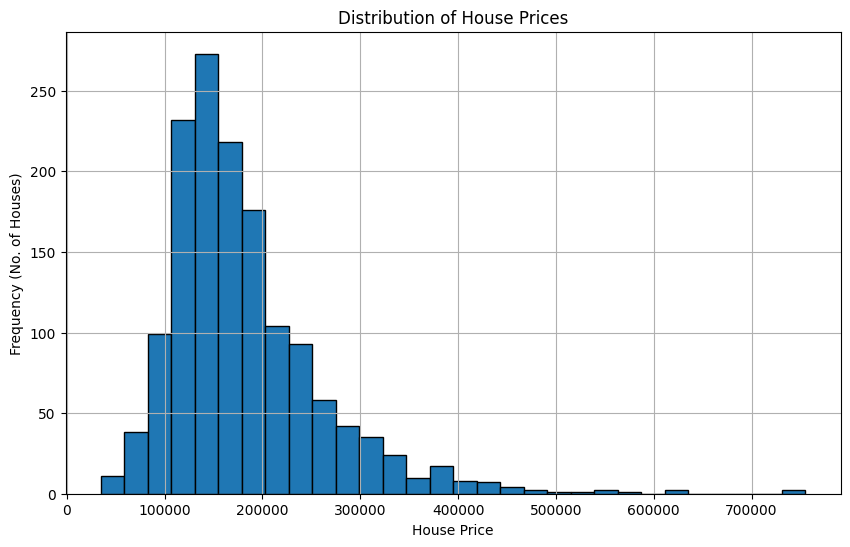

In [124]:
plt.figure(figsize=(10,6))
df['SalePrice'].hist(bins=30, edgecolor='black')
plt.title('Distribution of House Prices')
plt.xlabel('House Price')
plt.ylabel('Frequency (No. of Houses)')
plt.show()

Data Handling

In [125]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns=[i  for i in df.columns if i not in numeric_columns]
print(categorical_columns)

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']


Encoding

In [126]:
label_encoder=LabelEncoder()
for i in categorical_columns:
    df[i]=label_encoder.fit_transform(df[i])
print(df.head())

   Id  MSSubClass  MSZoning  LotArea  LotConfig  BldgType  OverallCond  \
0   0          60         3     8450          4         0            5   
1   1          20         3     9600          2         0            8   
2   2          60         3    11250          4         0            5   
3   3          70         3     9550          0         0            5   
4   4          60         3    14260          2         0            5   

   YearBuilt  YearRemodAdd  Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003           12         0.0        856.0   208500.0  
1       1976          1976            8         0.0       1262.0   181500.0  
2       2001          2002           12         0.0        920.0   223500.0  
3       1915          1970           13         0.0        756.0   140000.0  
4       2000          2000           12         0.0       1145.0   250000.0  


# **Feature Analysis**

###making correlation matrix using seaborn

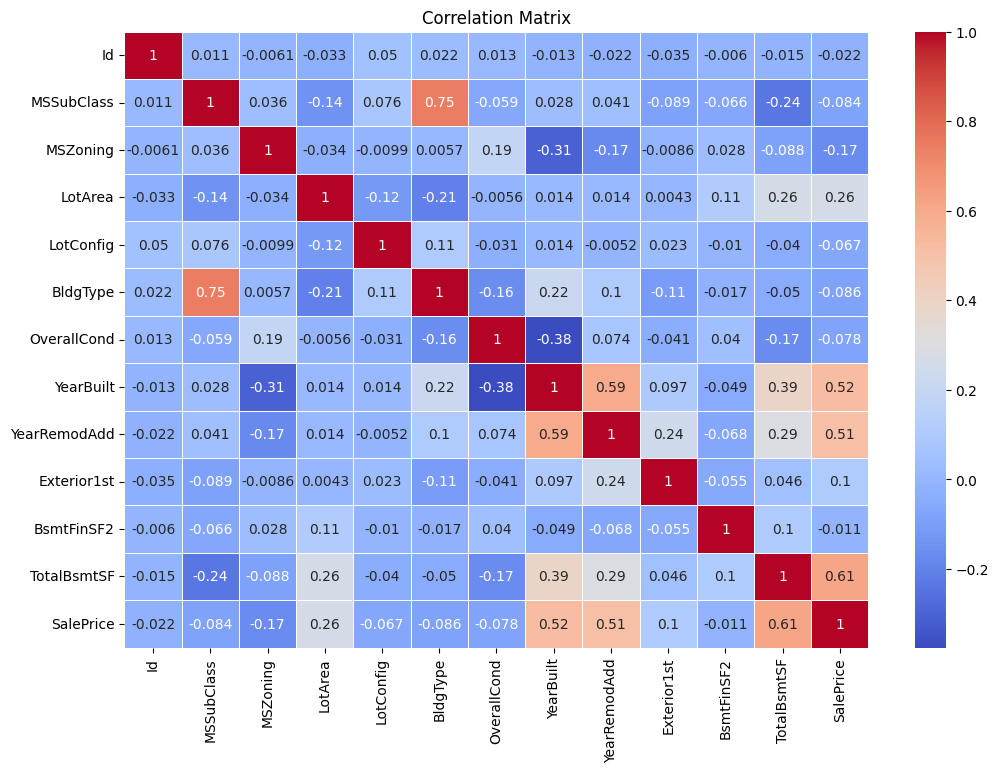

In [127]:
correlation_matrix=df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [128]:
# Assuming correlation_matrix is the calculated correlation matrix
target_correlations = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(target_correlations)

SalePrice       1.000000
TotalBsmtSF     0.613581
YearBuilt       0.522897
YearRemodAdd    0.507101
LotArea         0.263843
Exterior1st     0.103551
BsmtFinSF2     -0.011378
Id             -0.021917
LotConfig      -0.067396
OverallCond    -0.077856
MSSubClass     -0.084284
BldgType       -0.085591
MSZoning       -0.166872
Name: SalePrice, dtype: float64


 ### Extracting Useful features

In [129]:
correlation_threshold=0.1
important_features = target_correlations[abs(target_correlations) > correlation_threshold].index.tolist()
important_features.remove('SalePrice')
print(important_features)

['TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'LotArea', 'Exterior1st', 'MSZoning']


In [130]:
X = df[important_features]
y = df['SalePrice']

In [131]:
##     Data Preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler =  MinMaxScaler()
X = scaler.fit_transform(X)

### handling null values using simpleimputer

In [132]:
# Assuming X is your feature matrix
imputer = SimpleImputer(strategy='mean')  # Use 'mean', 'median', 'most_frequent', or a constant value
X = imputer.fit_transform(X)
y=y.values.reshape(-1,1)
y = imputer.fit_transform(y)

In [133]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X = poly.fit_transform(X)

In [134]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
print(X_train.shape,X_test.shape)

(1168, 28) (292, 28)


#Building Machine Learning Model

In [136]:
# Initialize and train a linear regression model
model = make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=2), LinearRegression())

model.fit(X_train, y_train)

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

In [137]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# **Model Evaluation**

In [138]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 186831591144.35217
R-squared (R2): -23.35771127560263



# **Fine Tuning**

## compare various models to select the best fit model

In [139]:
# Define regression models to compare
models = {
    'Linear Regression': make_pipeline(MinMaxScaler(), PolynomialFeatures(degree=2), LinearRegression()),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [140]:
# Evaluate different algorithms
results = {}
for name, model in models.items():
    num_folds = 5
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_score = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    results[name] = -np.mean(cv_score)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [141]:
# Print the results
for name, score in results.items():
    print(f"{name}: Average Cross-Validation MSE = {score}")

Linear Regression: Average Cross-Validation MSE = 8722571962970.56
Random Forest: Average Cross-Validation MSE = 1895018329.3922951
Gradient Boosting: Average Cross-Validation MSE = 1924416576.213993


In [142]:
# Choose the best model and evaluate on the test set
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

Best Model: Random Forest


In [143]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

<ipython-input-143-725b1631b88e>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(X_train, y_train)


### Evaluation on Best Model

In [144]:
test_mse = mean_squared_error(y_test, y_pred)
r2 = best_model.score(X_test, y_test)
print(f"R-squared Score with Best Model: {r2}")
print(f"Test Set MSE for Best Model: {test_mse}")

R-squared Score with Best Model: 0.7250628413825941
Test Set MSE for Best Model: 2108857693.0726519


In [145]:
# Hyperparameter tuning for the best model
if best_model_name == 'Random Forest' or best_model_name == 'Gradient Boosting':
    param_grid = {}  # Add relevant hyperparameters to optimize
    grid_search = GridSearchCV(best_model, param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)
    grid_search.fit(X_train, y_train.ravel())

    best_model_tuned = grid_search.best_estimator_
    y_pred_tuned = best_model_tuned.predict(X_test)

    # Model evaluation on the test set after tuning
    test_mse_tuned = mean_squared_error(y_test, y_pred_tuned)
    r2_tuned = best_model_tuned.score(X_test, y_test)

    print(f"Tuned Best Model: {best_model_name}")
    print(f"Tuned R-squared Score with Best Model: {r2_tuned}")
    print(f"Tuned Test Set MSE for Best Model: {test_mse_tuned}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Tuned Best Model: Random Forest
Tuned R-squared Score with Best Model: 0.7250628413825941
Tuned Test Set MSE for Best Model: 2108857693.0726519
